# Lineaire regressie
Lineaire regressie is de meest eenvoudige methode om time series data te modelleren. Beschouw onderstaand voorbeeld:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Voorbeeld
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Input
y = np.array([2, 4, 5, 4, 5])  # Target variabele


In [2]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

Visualisatie:

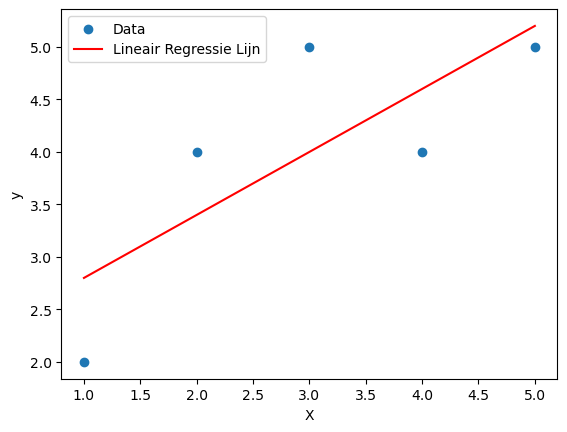

In [3]:
plt.scatter(X, y, label='Data')
plt.plot(X, predictions, color='red', label='Lineair Regressie Lijn')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Lineaire regressie (in 2 of meerdere variabelen) is uiteraard beperkt in het feit dat het gegeven model *lineair* is. Dit model kan wiskundig worden genoteerd als $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p + \epsilon $$

Hierbij is de $y$ dus een lineaire combinatie van de features $x_1, x_2 ...$, $\epsilon$ is de ruis die overblijft, maw de afwijking van de effectieve datapunten tegenover de voorspelde lineaire locatie.

Dus: 
\begin{align*}
    y & \text{ is the afhankelijke variable (label of target)} \\
    x_1, x_2, \ldots, x_p & \text{ zijn de variables (features, kolommen in dataset)} \\
    \beta_0, \beta_1, \beta_2, \ldots, \beta_p & \text{ zijn de coefficienten (parameters)} \\
    \epsilon & \text{ is de error term (residuals)}
\end{align*}

Het doel van linear regression is de coefficients ($\beta_0, \beta_1, \beta_2, \ldots, \beta_p$) zodanig maken dat de som van de gekwadrateerde residuals, minimaal is:  we hebben dan een goede fit voor de data.



Uiteraard is niet alles lineair, of heeft niet alles een lineaire trend. We moeten dus verder kijken naar andere modellen die net iets meer kunnen. Het volgende model, ARIMA, bouwt wel verder op dit basis idee van lineaire regressie.

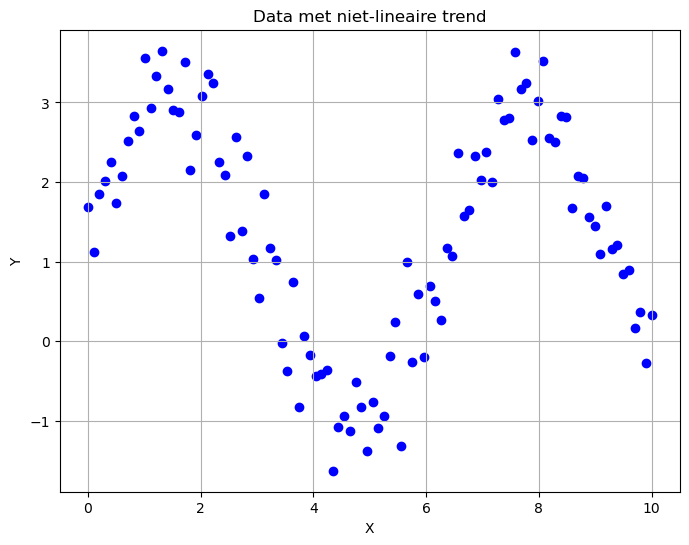

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Voorbeeld niet-lineaire trends

x = np.linspace(0, 10, 100)
y = 2 * np.sin(x) + 1 + 0.5 * np.random.randn(100)  # Non-linear sinus golf met ruis

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='b', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data met niet-lineaire trend')
plt.grid(True)
plt.show()

We zijn trouwens niet beperkt tot 2 dimensies, uiteraard kunnen hogere dimensies ook:

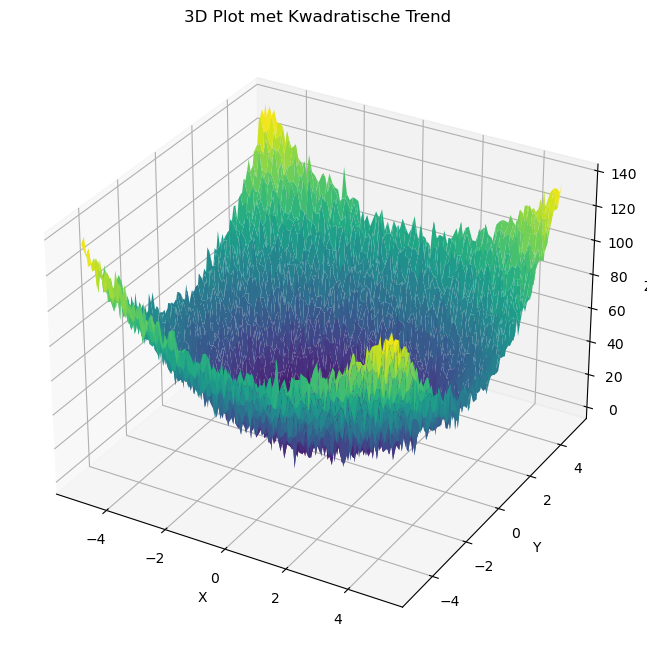

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

#wadratische trend en wat ruis
Z = 2 * X**2 + 3 * Y**2 + 10 + 5 * np.random.randn(100, 100)

# plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot met Kwadratische Trend')

plt.show()

# ARIMA

Auto-Regressive Integrated Moving Average
- AR: auto-regression: regressie via een vergelijking op vorige punten
- I: integratie, moet doelen op het feit dat er een 'trend' wordt gezocht
- MA: moving average of lopend gemiddelde: er wordt naar een bepaalde periode in het verleden gekeken.

Deze techniek is van toepassing op time-series data, dus data van bijvoorbeeld sensoren die in de loop der tijd dingen meet. Het model werkt onder bepaalde voorwaarden:
- geen cyclische trends
- weinig outliers
- variatie rond het gemiddelde blijft consistent in functie van de tijd (bvb sensors worden niet plots onnauwkeuriger)

$$ \mathrm{ARIMA}(p,q,d)$$ 
waarbij 
- $p$: het aantal AR termen. Hoe hoger dit aantal, hoe meer vroegere observaties in rekening worden genomen
- $d$: de orde van differentiatie. Als we een lineaire trend hebben, dan is d=1. Als we een kwadratische trend hebben, d=2, etc
- $q$: aantal MA termen. Hoe hoger dit cijfer, hoe groter het 'moving average' dat in rekening wordt genomen

### Wiskundige definities

**Auto-regression**:
Een ARIMA model maakt een predictie op basis van de vorige outputs van het model. Die vorige outputs noemen we *lags*. De eerste parameter van het ARIMA model geeft aan hoeveel van deze *lags* r worden meegenomen in het eerste model, dat dus van de vorm is

$$ y_t = \beta_0 + \beta_1 y_{t-1} + \beta_2 y_{t-2} + \ldots + \beta_{p} y_{t-p} $$ 

Dit model maakt dus voorspellingen, enkel en alleen door te kijken naar de vorige resultaten. Dit model kan enkel goed werken als het gemiddelde en standaardafwijking van de variabele *niet* wijzigen over de tijd. Dit model alleen is dus vaak niet goed genoeg.

**Moving average**:
Een ARIMA model heeft ook een *Moving Average*-parameter, genoteerd met de letter $q$. Een model dat enkel MA heeft (een *zuiver* MA-model), ziet er als volgt uit:

$$ y_t = \Phi_0 + \Phi_1 \epsilon_{t-1} + \Phi_2 \epsilon_{t-2} + \ldots + \Phi_q \epsilon_{t-q}$$ 
Hierbij moet het model de parameters $\Phi_i$ schatten. De $\epsilon$ in deze vergelijking zijn de *error terms* van dit model met auto-regressie, dus zo is 
$$ y_t = \beta_0 + \beta_1 y_{t-1} + \beta_2 y_{t-2} + \ldots + \beta_{q} y_{t-q} + \epsilon_t $$
De $\epsilon{t-1}$ is dus de fout van een auto-regressie op de lag net voor stap $t$. Ook dit model kan enkel goed werken als het gemiddelde en standaardafwijking van de variabele *niet* wijzigen over de tijd. 


Deze twee simpelere modellen zijn een onderdeel van het bredere model ARIMA.

**Integration**: onder integratie verstaan we de actie waarbij we twee naburige punten in de tijdsreeks van mekaar aftrekken. Zo is $$ \Delta y = y_t - y_{t-1}$$ een eerste keer gedifferentieerd. In essentie is telkens het verschil tussen een punt en het vorige punt berekend, en daarmee is een nieuwe tijdsreeks gemaakt. Dit proces kun je verschillende keren herhalen, we spreken dan van *integratie van orde d*.

Het interessante idee achter dit proces is dat er na verloop van tijd een rij getallen kan optreden die *stationair* is. Daar kan dan AR en/of MA op worden toegepast.



Wanneer een parameter op 0 wordt gezet, dan doet dat element niet mee in het uiteindelijk model. Zo kun je een simpel 'moving average' trendlijn maken (zuiver MA model) door *p*=0 en *q*=0 te stellen.

## Voorbeeld

We genereren eerst een random voorbeeld:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate a synthetic time series dataset
np.random.seed(41)
time_series = np.cumsum(np.random.randn(100))

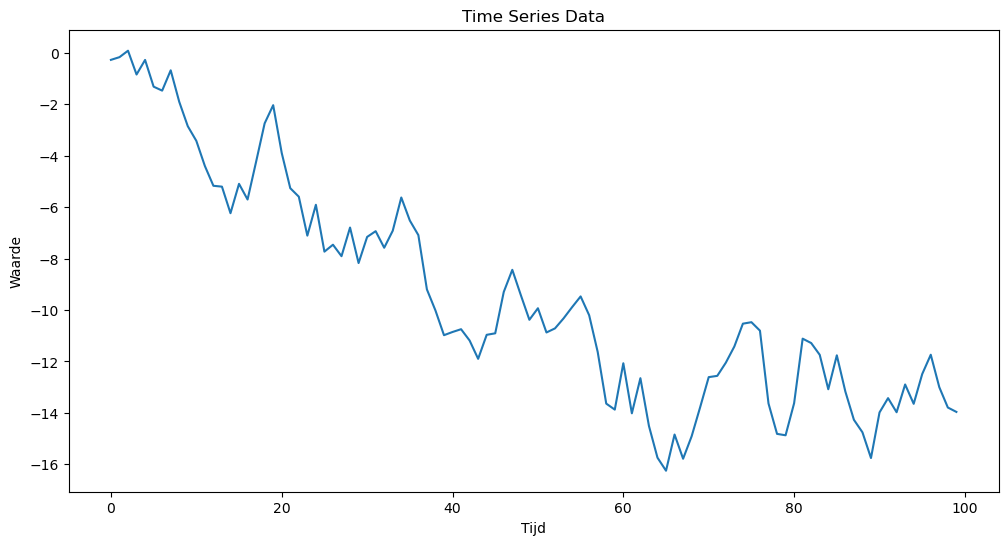

In [5]:
# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame({'value': time_series})

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['value'])
plt.title('Time Series Data')
plt.xlabel('Tijd')
plt.ylabel('Waarde')
plt.show()

### d differencing parameter zoeken

In [38]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna()) #The null hypothese van deof the ADF test is dat de time series niet-stationair is.
print('ADF statistiek: %f' % result[0])
print('p-waarde: %f' % result[1]) # als p groter is dan 0.05, dan mag je ervan uitgaan dat de reeks niet-stationair is

ADF statistiek: -1.358332
p-waarde: 0.602081


We gaan nu wat differencing doen, en kijken hoe de plots  de autocorrelatie er intussen uitzien.

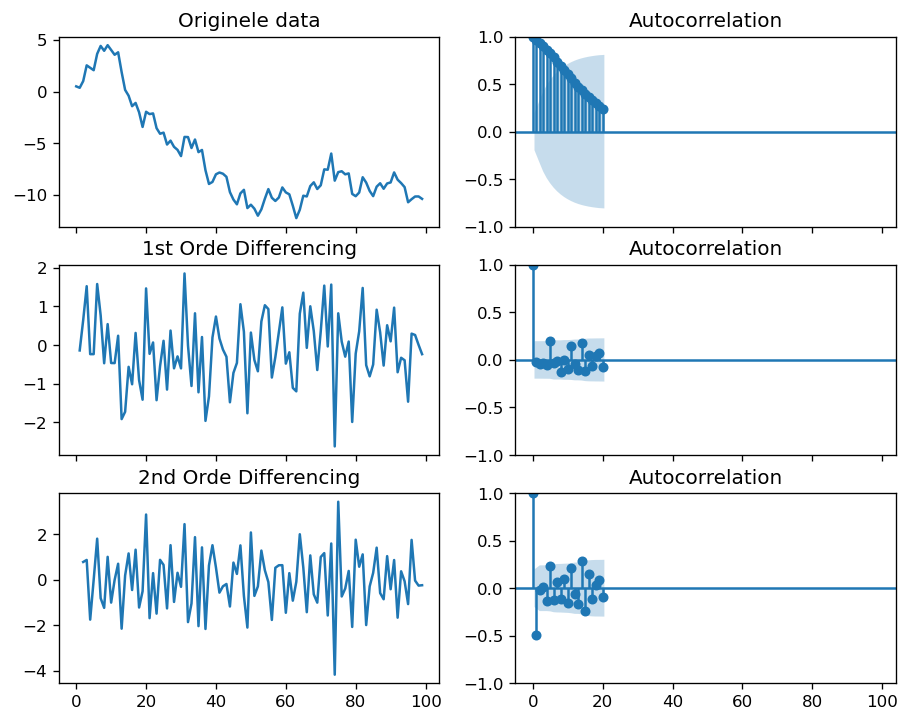

In [39]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Originele data')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Orde Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Orde Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Je zuit duidelijk dat na 1 keer differentiëren de data zich al begint te gedragen als een stationaire reeks. Verder differentiëren is dus niet nodig, de tweede orde brengt niks bij.

Package installeren - dit geeft mogelijk problemen:
```bash
conda config --add channels conda-forge
conda config --set channel_priority strict
conda install pmdarima
```

### p zoeken voor automatic regression
We gaan de Partial Autocorrelation (PACF) plot gebruiken. PACF geeft de correlatie aan tussen een lag en heel de reeks. Op basis van de PACF kan je beslissen hoeveel lags er nodig zijn in de AR.

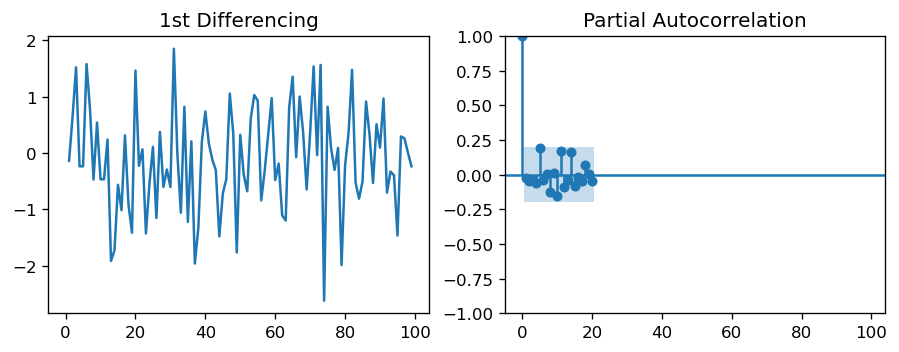

In [41]:
# PACF plot van 1st difference reeks
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

Je wil in essentie de lags bijhouden die buiten de lichtblauwe zone komen. Hier komt na de eerste bijna niets meer erboven, dus $p=1$ is een goede keuze.

### q zoeken voor moving average

Net zoals we naar de PACF plot kijken voor de AR termen, kijken we ar de AFC plot voor het aantal MA termen $q$. De ACF toont hoeveel MA termen er nodig zijn om eventueel resterende autocorrelatie weg te werken zodat er een stationaire reeks overblijft.
relation in the stationarized series.

We kijken naar de autocorrelation plot van de differenced series.

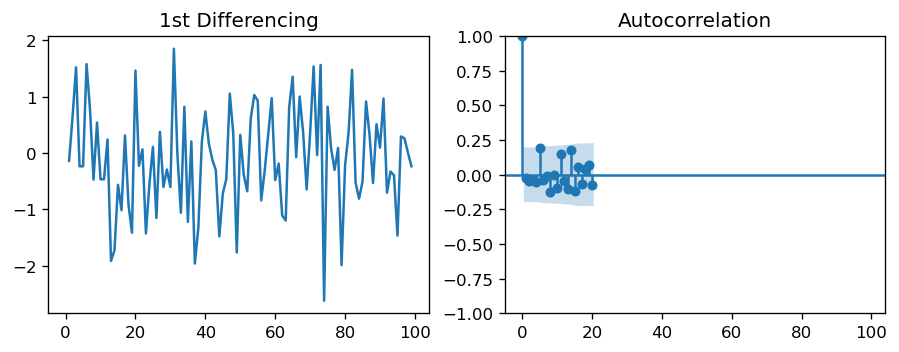

In [42]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

Ook hier kan je dus beginnen met $q=1$.

Nu kunnen we het model fitten.

In [70]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -131.425
Date:                Fri, 03 Nov 2023   AIC                            268.850
Time:                        11:32:03   BIC                            276.635
Sample:                             0   HQIC                           272.000
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3986      5.650      0.071      0.944     -10.676      11.473
ma.L1         -0.4147      5.592     -0.074      0.941     -11.376      10.546
sigma2         0.8330      0.123      6.780      0.0

Wat uitleg over de gegevens hierboven: de AIC is een getal wat voor goed model zo laag mogelijk is. Als je dus twijfelt over verschillende versies, check dan die AIC (Akaike Information Criterion - https://en.wikipedia.org/wiki/Akaike_information_criterion) en kies het model met de laagste waarde.

Tot slot kijken we naar de uiteindelijke fouten, en kijken we of deze normaal zijn verdeeld met een KDE (Kernel Density Estimation) plot.

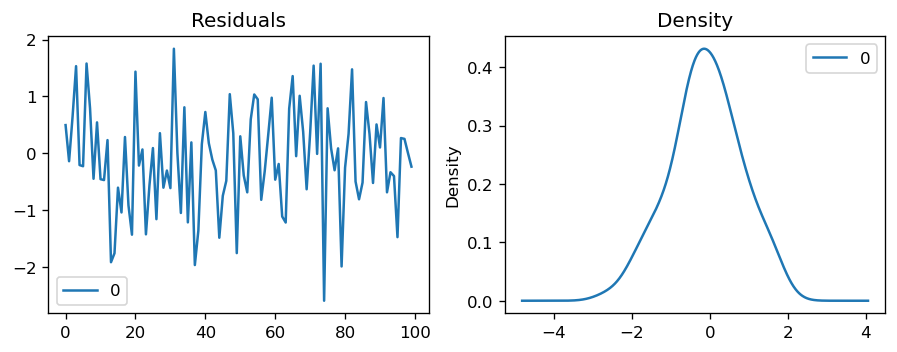

In [71]:
# Plot residual errors, eg de uiteindelijke fout van het model
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

We kunnen toekomstige waarden voorspellen:

In [72]:
forecast_steps = 25
forecast = model_fit.forecast(steps=forecast_steps)

In deze forecast zitten nu gewoon nieuwe tijdstappen die de trend van de data volgen.

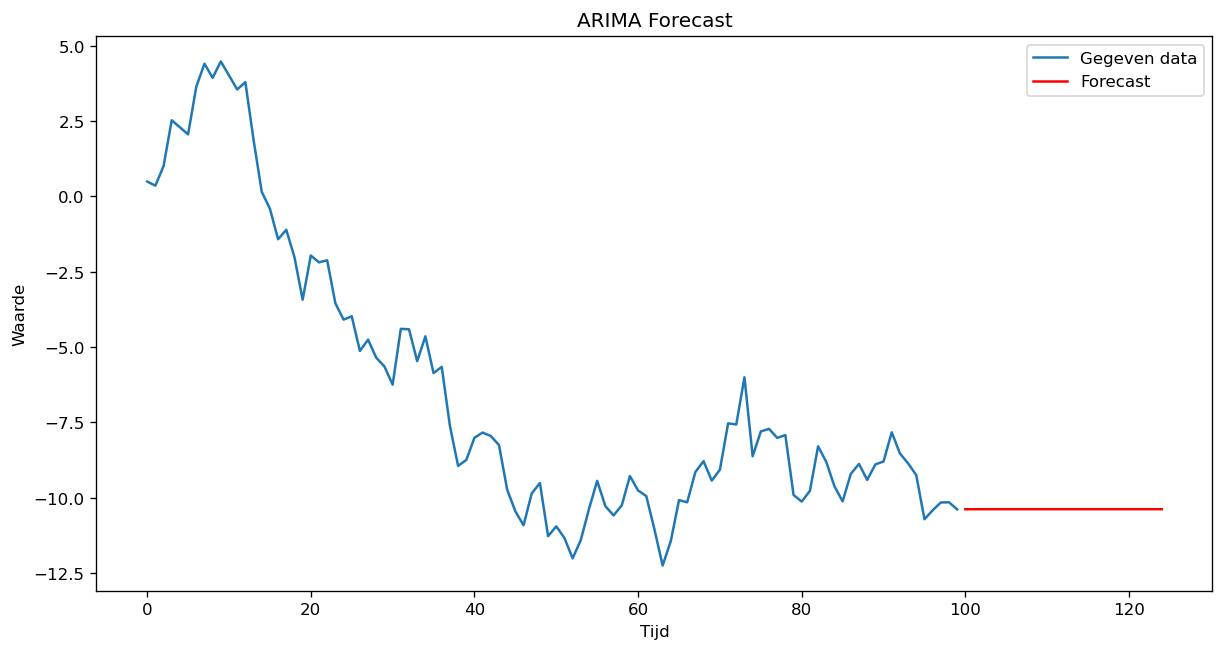

In [73]:
#plot om goed te kunnen kijken hoe dat eruitziet

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(df)), df['value'], label='Gegeven data')
plt.plot(np.arange(len(df), len(df) + forecast_steps), forecast, label='Forecast', color='red')

plt.title('ARIMA Forecast')
plt.xlabel('Tijd')
plt.ylabel('Waarde')
plt.legend()
plt.show()

In [57]:
model_fit.forecast(steps=forecast_steps)

100   -10.381165
101   -10.379775
102   -10.379221
103   -10.379000
104   -10.378912
105   -10.378877
106   -10.378863
107   -10.378858
108   -10.378855
109   -10.378855
110   -10.378854
111   -10.378854
112   -10.378854
113   -10.378854
114   -10.378854
115   -10.378854
116   -10.378854
117   -10.378854
118   -10.378854
119   -10.378854
120   -10.378854
121   -10.378854
122   -10.378854
123   -10.378854
124   -10.378854
Name: predicted_mean, dtype: float64

Je kunt nu variëren met de parameters van order.

### Shampoo dataset uitgewerkt voorbeeld

/tmp/ipykernel_2166/2617436763.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


            value
Month            
2011-01-01  266.0
2011-02-01  145.9
2011-03-01  183.1
2011-04-01  119.3
2011-05-01  180.3


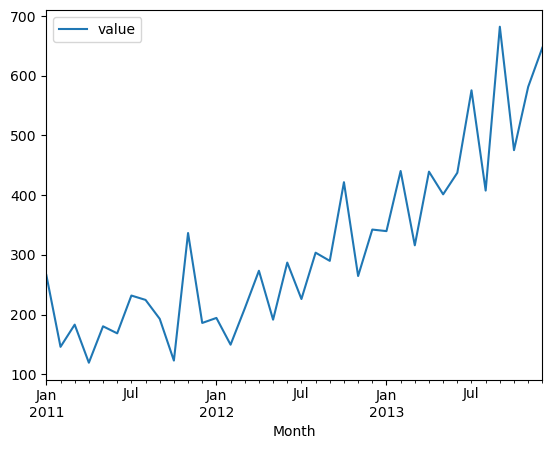

In [7]:
# data inladen
import pandas as pd
from matplotlib import pyplot
from datetime import datetime
 
def parser(x):
    return datetime.strptime('201'+x, '%Y-%m')

#de volgende lijn leest de data in een parset de eerste kolom als data; en maakt er een index van. Zulke handeling is wel vaker nodig voor time series databases.
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series.rename(columns={'Sales':'value'}, inplace=True)
print(series.head())
series.plot()
pyplot.show()


In [8]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(series.value.dropna()) #The null hypothese van deof the ADF test is dat de time series niet-stationair is.
print('ADF statistiek: %f' % result[0])
print('p-waarde: %f' % result[1]) # als p groter is dan 0.05, dan mag je ervan uitgaan dat de reeks niet-stationair is

ADF statistiek: 3.060142
p-waarde: 1.000000


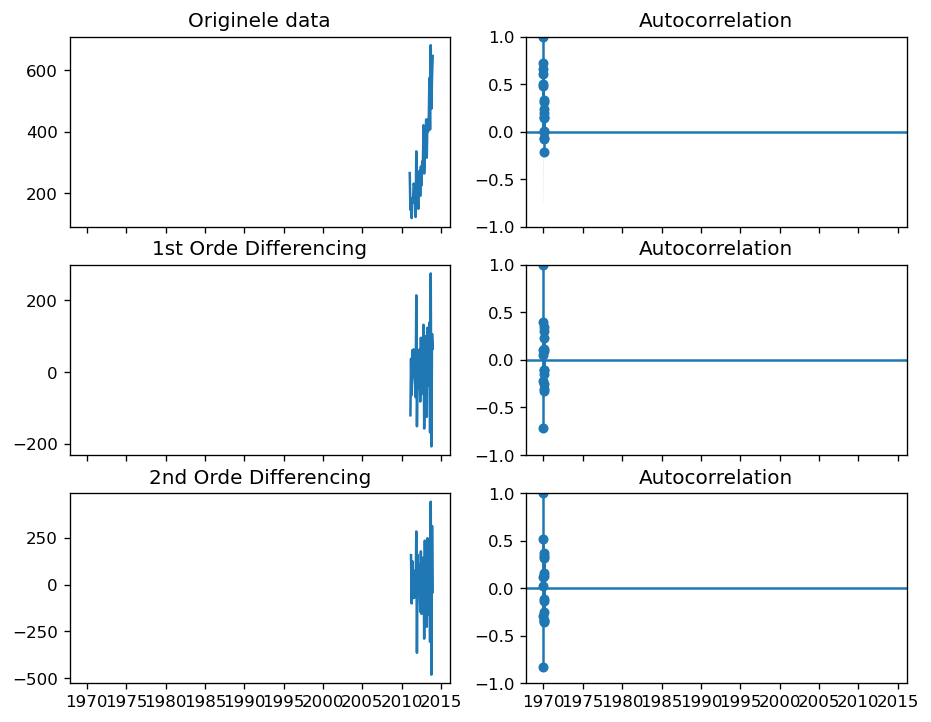

In [12]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(series.value); axes[0, 0].set_title('Originele data')
plot_acf(series.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(series.value.diff()); axes[1, 0].set_title('1st Orde Differencing')
plot_acf(series.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(series.value.diff().diff()); axes[2, 0].set_title('2nd Orde Differencing')
plot_acf(series.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

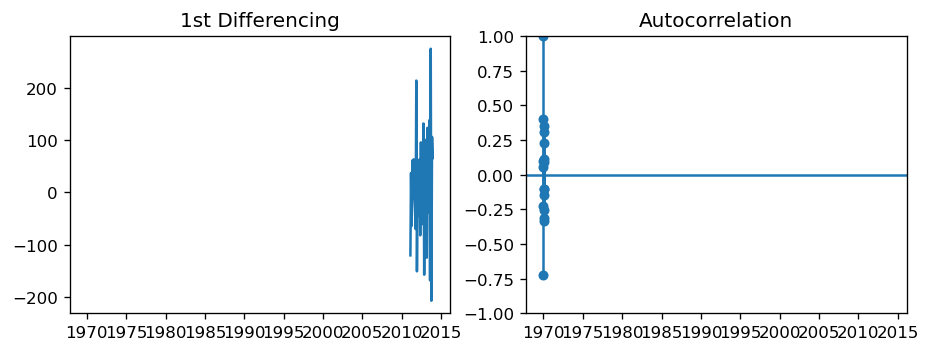

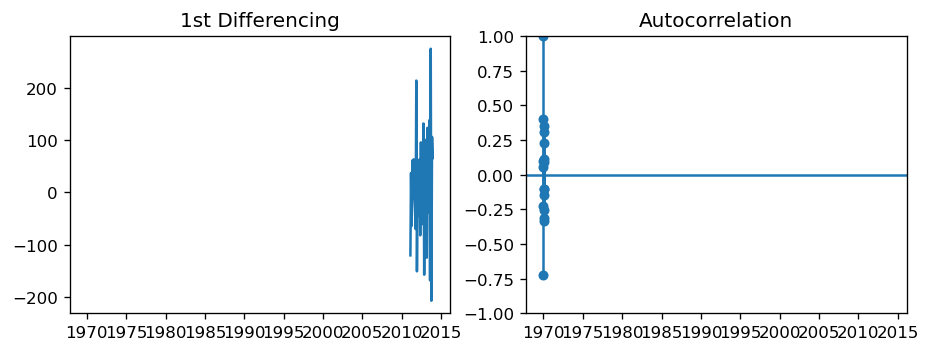

In [13]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(series.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,700))
plot_acf(series.value.diff().dropna(), ax=axes[1])

Er zit een duidelijke trend in deze dataset. We kijken eerst naar de autocorrelatieplot van deze tijdsreeks. Dit toont de correlatiecoëfficiënten tussen een punt in een tijdsreeks en haar 'lagged values' = vorige punten. Het biedt een inzicht in de mate van gelijkaardigheid tussen de tijdsreeks en een verschoven ('lagged') versie ervan.

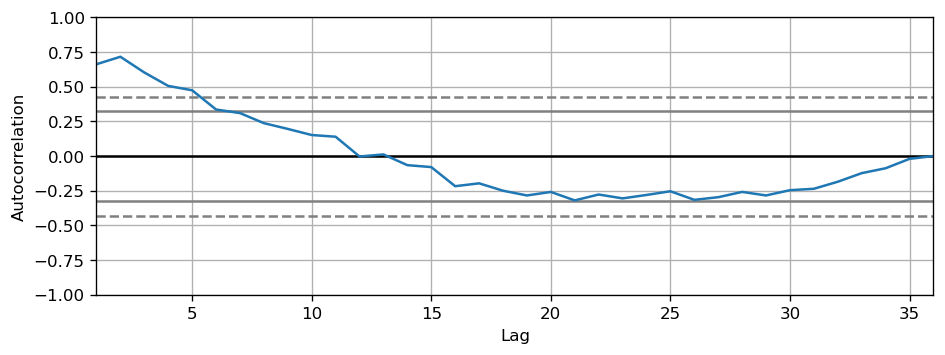

In [14]:
from datetime import datetime
from matplotlib import pyplot
import pandas as pd
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(series)
pyplot.show()

Door goed naar deze grafiek te kijken, kunnen we bijvoorbeeld zien dat er op een lag van 12 = 12 maanden geen correlatie is. Dit wil dus zoveel zeggen als dat er op 1 jaar tijd hetzelfde patroon begint terug te keren. Voor de eerste 5 lags is de positieve trend significant (boven het stippellijntje), dus is het een idee om een AR-model te starten met parameter 5.

### ARIMA model toepassen met zinvolle parameters

In [15]:
# reeks op maandniveau periodiseren
#series.index = series.index.to_period('M')

# fit model. Als AR-parameter geven we na analyse van bovenstaande plot 5 in
model = ARIMA(series, order=(5,1,0)) 
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


/home/bruno/miniconda3/envs/ml_algorithms/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/bruno/miniconda3/envs/ml_algorithms/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/bruno/miniconda3/envs/ml_algorithms/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Mon, 06 Nov 2023   AIC                            408.969
Time:                        12:29:18   BIC                            418.301
Sample:                    01-01-2011   HQIC                           412.191
                         - 12-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

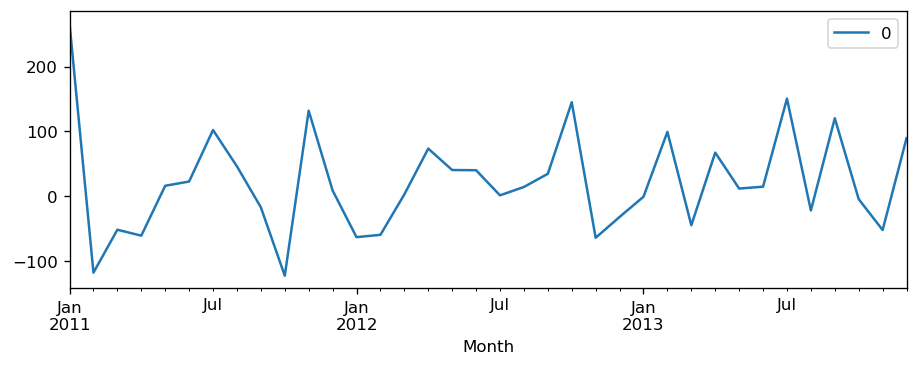

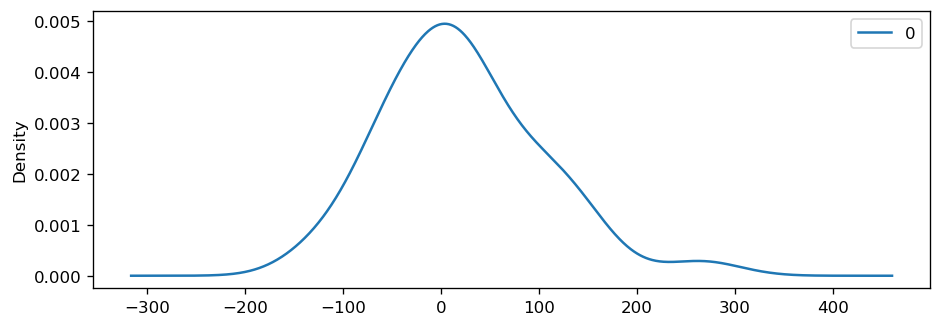

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [16]:
# Plots

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

De density plot lijkt een Gaussische curve te zijn, maar uit de statistieken eronder geprint zie je dat deze niet is gecentreerd rond 0, maar rond 21.93. 

### Voorspellingen maken

In [17]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

We gaan de code netjes in train en test splitten:

In [18]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

We kunnen nu een zogenaamde 'walk-forward' evaluatie doen:

In [26]:
# walk-forward validation
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,2,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=615.378658, expected=342.300000
predicted=728.358601, expected=339.700000
predicted=273.839176, expected=440.400000
predicted=406.842535, expected=315.900000
predicted=403.169069, expected=439.300000
predicted=378.946765, expected=401.300000
predicted=418.793923, expected=437.400000
predicted=422.870101, expected=575.500000
predicted=476.325263, expected=407.600000
predicted=514.473617, expected=682.000000
predicted=502.192141, expected=475.300000
predicted=607.813051, expected=581.300000
predicted=543.269566, expected=646.900000


Evaluatie:

In [27]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 159.818


Plotting:

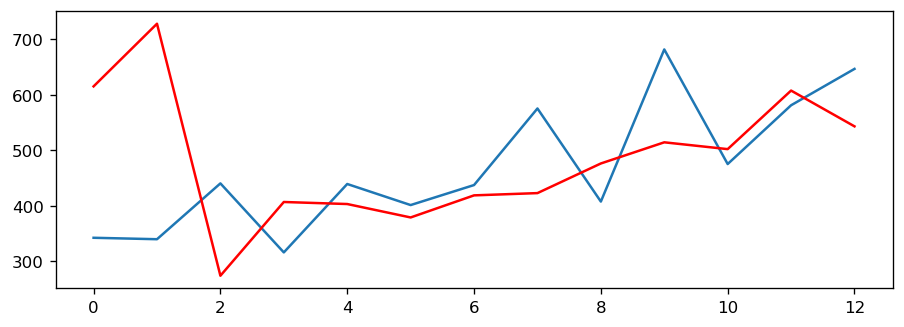

In [28]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Finetuning
Finetuning gebeurt met de zogenaamde *Box-Jenkins methode*:
1. Gebruik plots zoals hierboven om trends, seasonality en autoregressie elementen terug te vinden, om een idee te krijgen over de lag en de mate van differencing die nodig is.
2. Fit je model met deze zinvolle parameters.
3. Check: zit er op de plots van de residual error nog structuur ? Dan kan je het process herhalen

**Grid Search**

Je kan ook een Grid Search gebruiken om de optimale parameters te vinden. We herschrijven de vorige code in een functie:

In [21]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

In [23]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [24]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue

    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

Nu kun je de code gebruiken:

In [25]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore") # de output is anders heel 'cluttered'. Enkel te gebruiken als je weet waar je mee bezig bent
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=228.966
ARIMA(0, 0, 1) RMSE=195.596
ARIMA(0, 0, 2) RMSE=154.886
ARIMA(0, 1, 0) RMSE=133.156
ARIMA(0, 1, 1) RMSE=104.077
ARIMA(0, 1, 2) RMSE=68.345
ARIMA(0, 2, 0) RMSE=255.187
ARIMA(0, 2, 1) RMSE=134.168
ARIMA(0, 2, 2) RMSE=74.644
ARIMA(1, 0, 0) RMSE=152.028
ARIMA(1, 0, 1) RMSE=111.787
ARIMA(1, 0, 2) RMSE=77.086
ARIMA(1, 1, 0) RMSE=88.631
ARIMA(1, 1, 1) RMSE=87.942
ARIMA(1, 1, 2) RMSE=90.986
ARIMA(1, 2, 0) RMSE=134.576
ARIMA(1, 2, 1) RMSE=86.157
ARIMA(1, 2, 2) RMSE=65.511
ARIMA(2, 0, 0) RMSE=100.879
ARIMA(2, 0, 1) RMSE=98.953
ARIMA(2, 0, 2) RMSE=98.688
ARIMA(2, 1, 0) RMSE=85.063
ARIMA(2, 1, 1) RMSE=88.428
ARIMA(2, 1, 2) RMSE=83.497
ARIMA(2, 2, 0) RMSE=97.829
ARIMA(2, 2, 1) RMSE=76.847
ARIMA(2, 2, 2) RMSE=80.807
ARIMA(4, 0, 0) RMSE=100.974
ARIMA(4, 0, 1) RMSE=101.510
ARIMA(4, 0, 2) RMSE=97.333
ARIMA(4, 1, 0) RMSE=95.068
ARIMA(4, 1, 1) RMSE=84.809
ARIMA(4, 1, 2) RMSE=84.204
ARIMA(4, 2, 0) RMSE=85.397
ARIMA(4, 2, 1) RMSE=74.219
ARIMA(4, 2, 2) RMSE=70.141
ARIMA(6, 0, 0) 

# Kalman Filters

In vliegtuigen wordt gebruik gemaakt van sensoren die voortdurend input gegeven aan de automatische piloot wanneer het vliegtuig op hoogte een stabiele bann volgt. Een Kalman filter is een systeem waarbij je de inputsensor niet ruw doorgeeft aan de boordcomputer, om te vermijden dat één slechte meting zou leiden tot een vliegtuig dat begint bij te sturen. Zonder Kalman filter zou een boordcomputer voortdurend bijsturen, terwijl die in regel door de ruis op de meting vaak niets hoeft te doen.